Import Libraries

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Load Data

In [209]:
df = pd.read_csv(r"C:\Users\ezath\Downloads\train (1).csv")

Show Data

In [210]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [211]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [213]:
df.shape

(1460, 81)

In [214]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [215]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [216]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Check for Null Values

In [217]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Handle Missing Values

In [218]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)

In [219]:
Columns_null=[
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond',
    'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure',
    'FireplaceQu', 'GarageType', 'GarageFinish',
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]
zero_cols = [
    'GarageYrBlt', 'MasVnrArea'
]

for col in Columns_null:
    df[col].fillna('None',inplace=True)

for col_1 in Columns_null:
    df[col].fillna(0,inplace=True)



In [220]:
df.dropna(subset=['Electrical'],inplace=True)

Check for Duplicated Values

In [221]:
df.duplicated().sum()

np.int64(0)

Check For Outliers

In [222]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if df[(df[col] < lower) | (df[col] > upper)].shape[0] > 0:
        outlier_cols.append(col)

print(f"cols_Outliers: {outlier_cols}")

cols_Outliers: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


Handle Outliers by Clipping

In [223]:
clipping_cols = [
    'LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF',
    'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF', 'TotalBsmtSF',
    'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','PoolArea','BsmtUnfSF'
]

for col_2 in clipping_cols:
    Q1 = df[col_2].quantile(0.25)
    Q3 = df[col_2].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    
    df[col_2] = df[col_2].clip(lower, upper)

print(f"Clipping applied to: {clipping_cols}")
print(f"Number of rows after clipping: {df.shape[0]}")


Clipping applied to: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'TotalBsmtSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea', 'BsmtUnfSF']
Number of rows after clipping: 1459


Handle Outliers by Remove

In [224]:
remove = [
    'MSSubClass','OverallQual', 'OverallCond',
    'BsmtFinSF1','2ndFlrSF','1stFlrSF',
    'BsmtFullBath', 'BsmtHalfBath','BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces','GarageCars','YearBuilt'
]

for col_3 in remove:
    Q1 = df[col_3].quantile(0.25)
    Q3 = df[col_3].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col_3] >= lower) & (df[col_3] <= upper)]

print(f"removed_cols_outliers: {remove}")
print(f"Number of rows after removing: {df.shape[0]}")



removed_cols_outliers: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YearBuilt']
Number of rows after removing: 1081


EDA Viualization

In [225]:
numeric_df=df.select_dtypes(include=['int64','float64'])
top_features = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).index


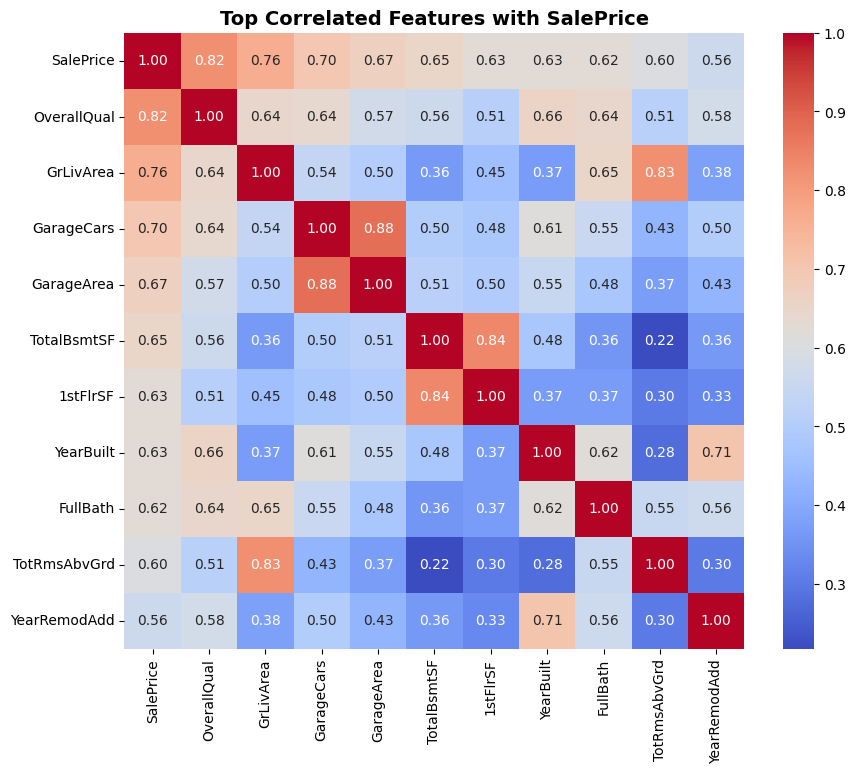

In [226]:
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with SalePrice", fontsize=14, fontweight='bold')
plt.show()


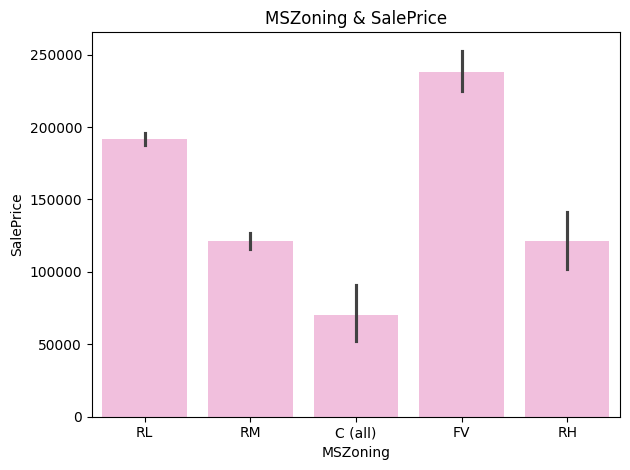

In [227]:
sns.barplot(data=df,x=df['MSZoning'], y=df['SalePrice'], color='#F9B7DFFF')
plt.title("MSZoning & SalePrice")
plt.tight_layout()
plt.show()

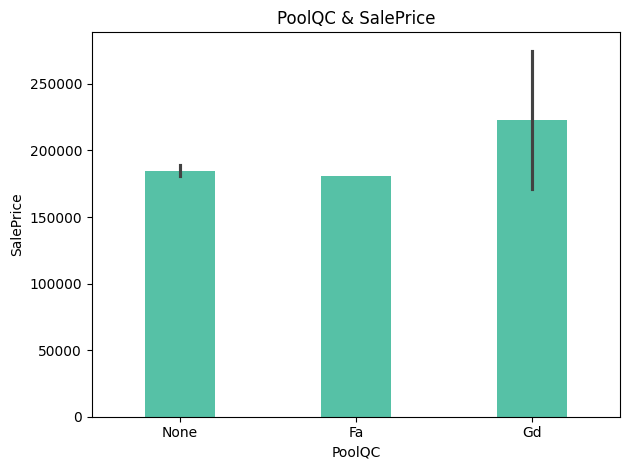

In [228]:
sns.barplot(data=df,x=df['PoolQC'], y=df['SalePrice'], color="#44D3AFFF",width=0.4)
plt.title("PoolQC & SalePrice")
plt.tight_layout()
plt.show()

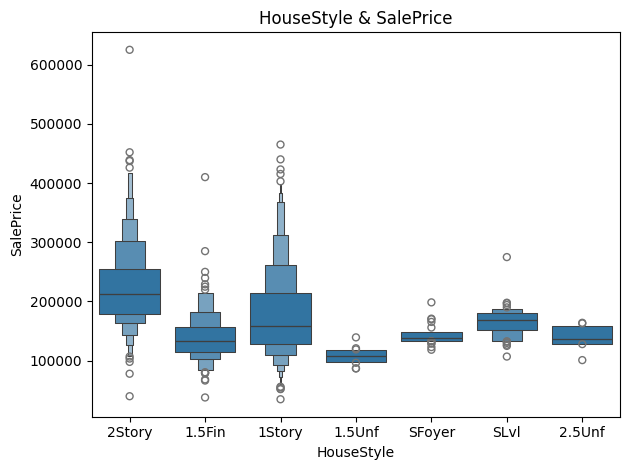

In [229]:
sns.boxenplot(x=df['HouseStyle'],y=df['SalePrice'],data=df)
plt.title("HouseStyle & SalePrice")
plt.tight_layout()
plt.show()

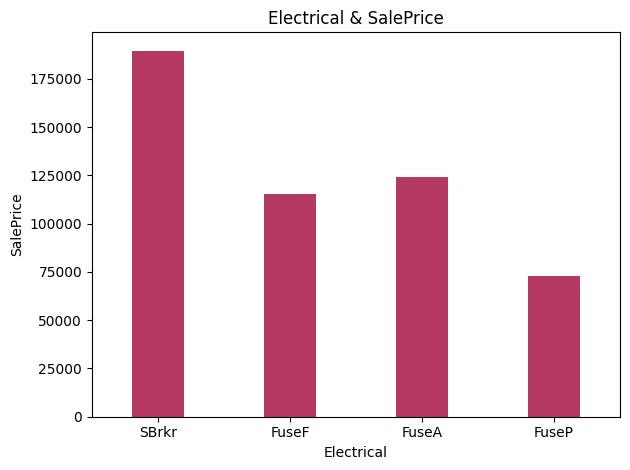

In [230]:
sns.barplot(data=df,x=df['Electrical'], y=df['SalePrice'], color="#C8245AFF",width=0.4,errorbar=None)
plt.title("Electrical & SalePrice")
plt.tight_layout()
plt.show()

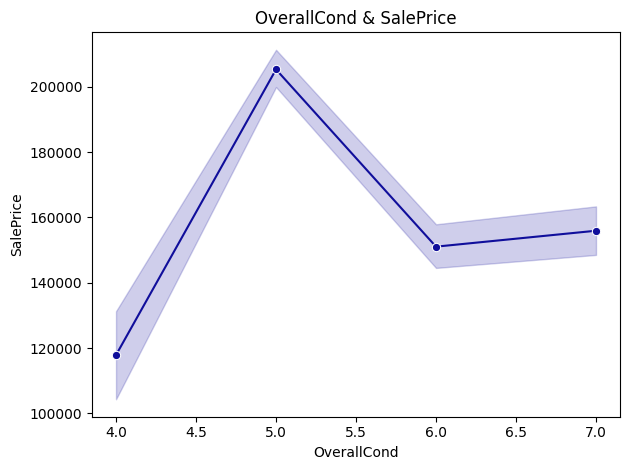

In [231]:
sns.lineplot(data=df,x=df['OverallCond'],y=df['SalePrice'],color="#100E9BFF",marker='o')
plt.title("OverallCond & SalePrice")
plt.tight_layout()
plt.show()

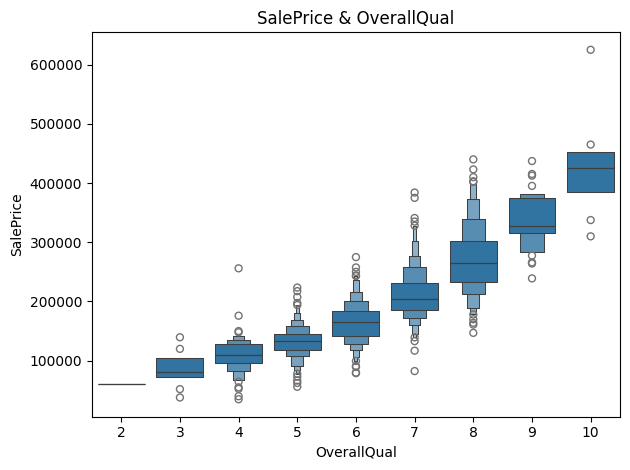

In [232]:
sns.boxenplot(x=df['OverallQual'],y=df['SalePrice'],data=df)
plt.title('SalePrice & OverallQual')
plt.tight_layout()
plt.show()

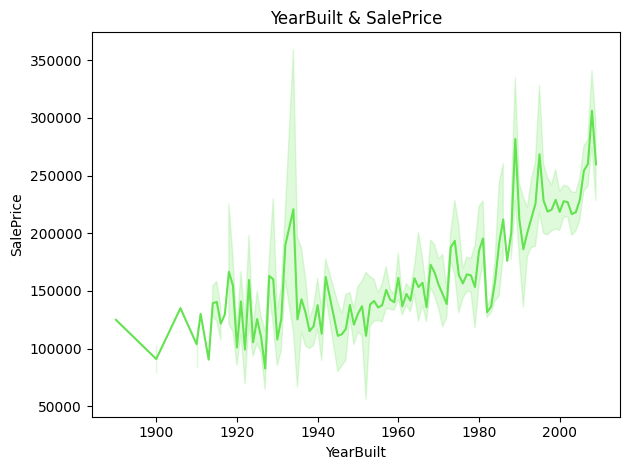

In [233]:
sns.lineplot(x=df['YearBuilt'],y=df['SalePrice'],data=df,color="#62E34FFF")
plt.title("YearBuilt & SalePrice")
plt.tight_layout()
plt.show()

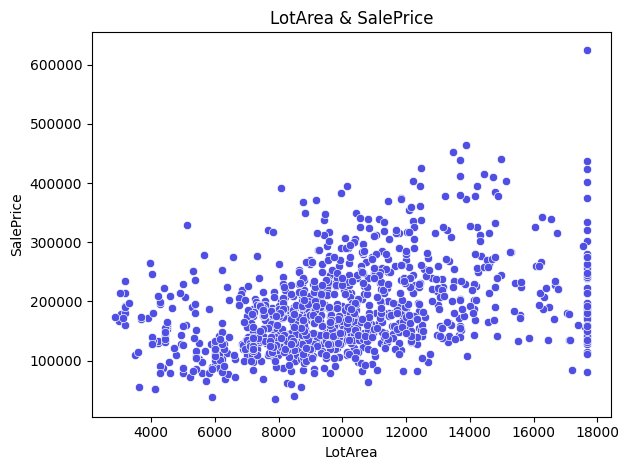

In [234]:
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'],data=df,color="#4F4FE3FF")
plt.title("LotArea & SalePrice")
plt.tight_layout()
plt.show()

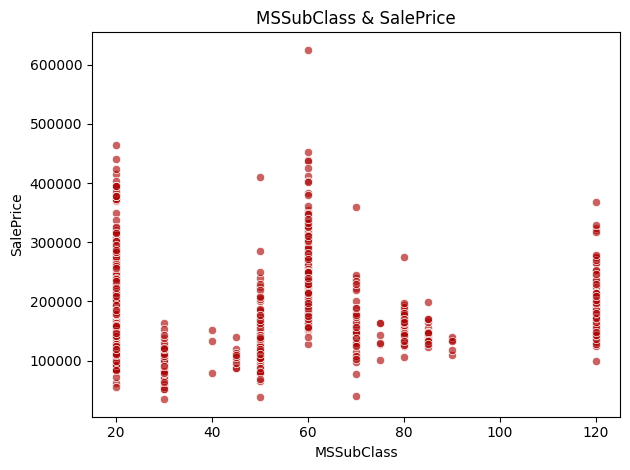

In [235]:
sns.scatterplot(x=df['MSSubClass'],y=df['SalePrice'],data=df,color="#AE0505A1")
plt.title("MSSubClass & SalePrice")
plt.tight_layout()
plt.show()

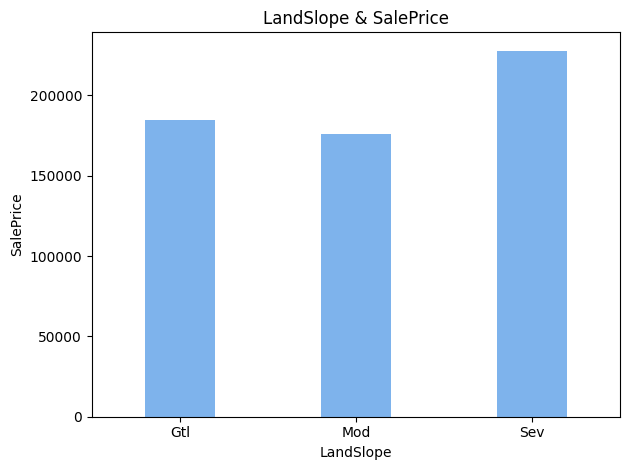

In [236]:
sns.barplot(data=df,x=df['LandSlope'], y=df['SalePrice'], color="#6CB3FEFF",width=0.4,errorbar=None)
plt.title("LandSlope & SalePrice")
plt.tight_layout()
plt.show()

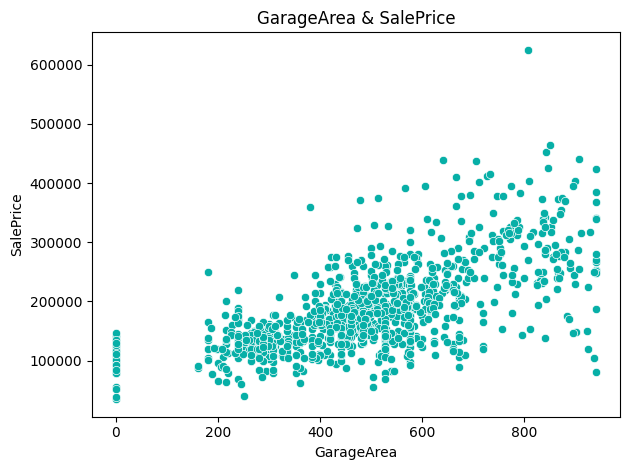

In [237]:
sns.scatterplot(data=df,x=df['GarageArea'], y=df['SalePrice'], color="#07AFA7FF")
plt.title("GarageArea & SalePrice")
plt.tight_layout()
plt.show()

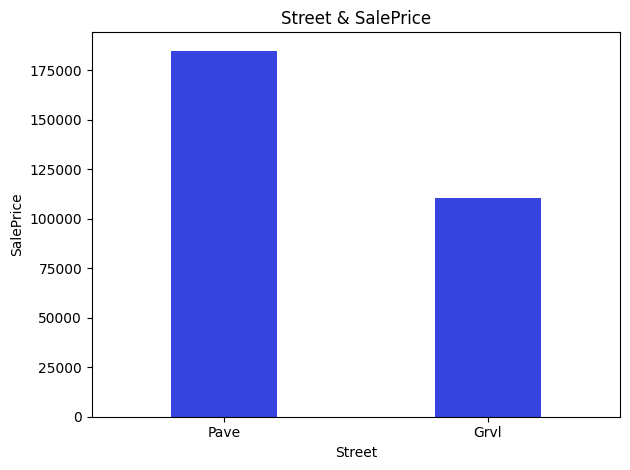

In [238]:
sns.barplot(data=df,x=df['Street'], y=df['SalePrice'], color="#1B2EFAFF",width=0.4,errorbar=None)
plt.title("Street & SalePrice")
plt.tight_layout()
plt.show()

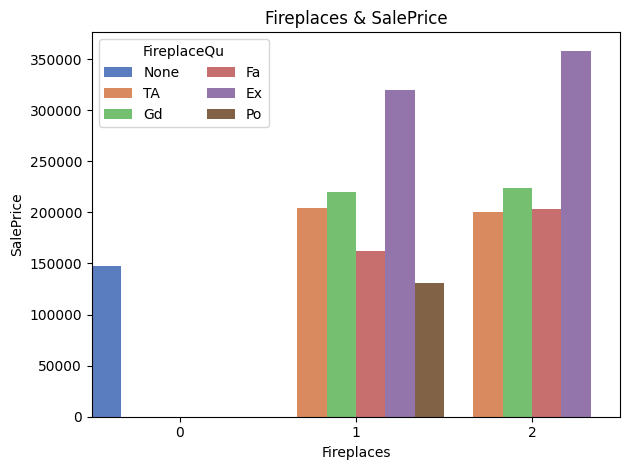

In [239]:
sns.barplot(x=df['Fireplaces'],y=df['SalePrice'],hue=df['FireplaceQu'],palette='muted',width=1,errorbar=None)
plt.title("Fireplaces & SalePrice")
plt.legend(title='FireplaceQu',loc='upper left',ncol=2)
plt.tight_layout()
plt.show()

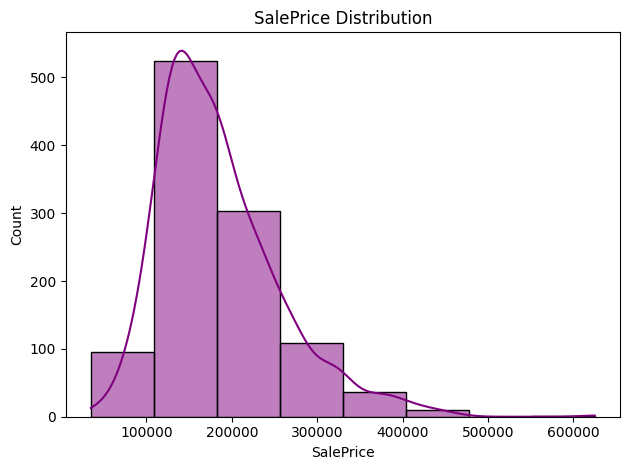

In [240]:
sns.histplot(data=df,bins=8,x=df['SalePrice'],kde=True,color='purple')
plt.title("SalePrice Distribution")
plt.tight_layout()
plt.show()

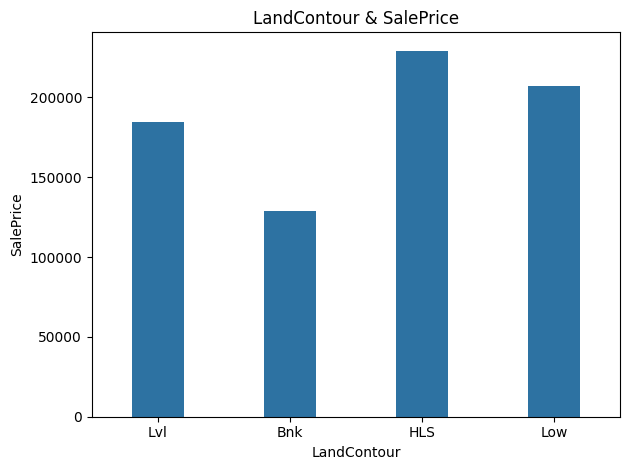

In [241]:
sns.barplot(data=df,x=df['LandContour'], y=df['SalePrice'], color="#1976B5",width=0.4,errorbar=None)
plt.title("LandContour & SalePrice")
plt.tight_layout()
plt.show()

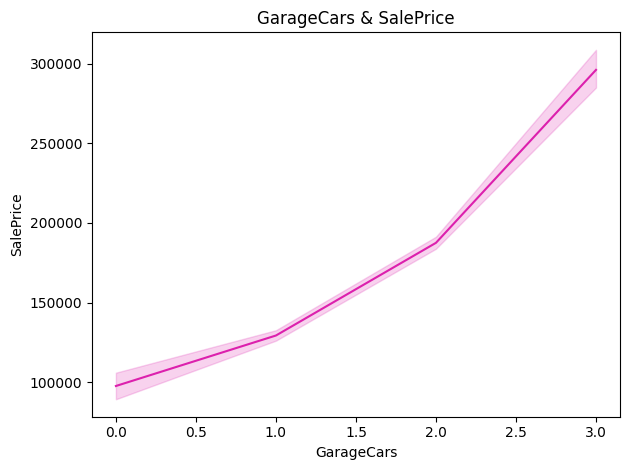

In [242]:
sns.lineplot(data=df,x=df['GarageCars'], y=df['SalePrice'], color="#DC20AD")
plt.title("GarageCars & SalePrice")
plt.tight_layout()
plt.show()

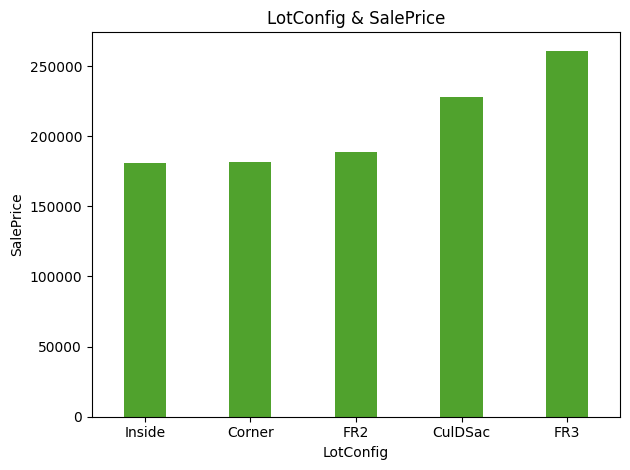

In [243]:

sns.barplot(data=df,x=df['LotConfig'], y=df['SalePrice'], color="#48B519",width=0.4,errorbar=None)
plt.title("LotConfig & SalePrice")
plt.tight_layout()
plt.show()

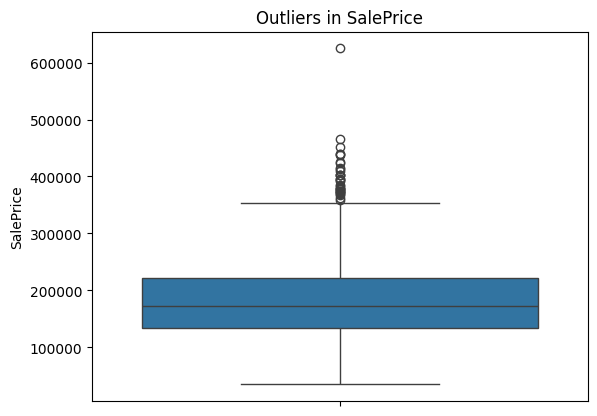

In [244]:
sns.boxplot(y=df['SalePrice'],data=df)
plt.title("Outliers in SalePrice")
plt.show()

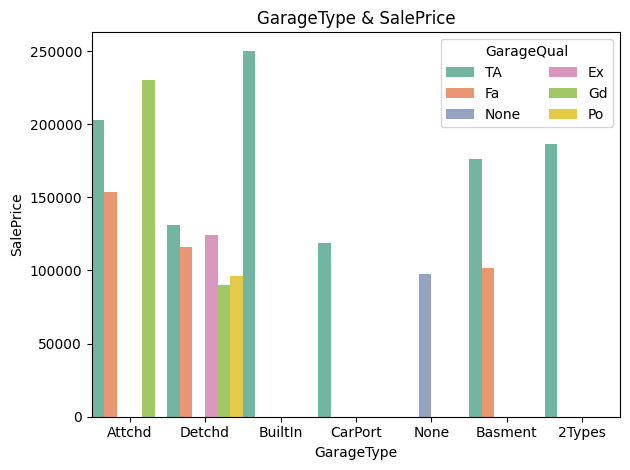

In [251]:
sns.barplot(x=df['GarageType'],y=df['SalePrice'],hue=df['GarageQual'],palette='Set2',width=1,errorbar=None)
plt.title("GarageType & SalePrice")
plt.legend(title='GarageQual',loc='upper right',ncol=2)
plt.tight_layout()
plt.show()

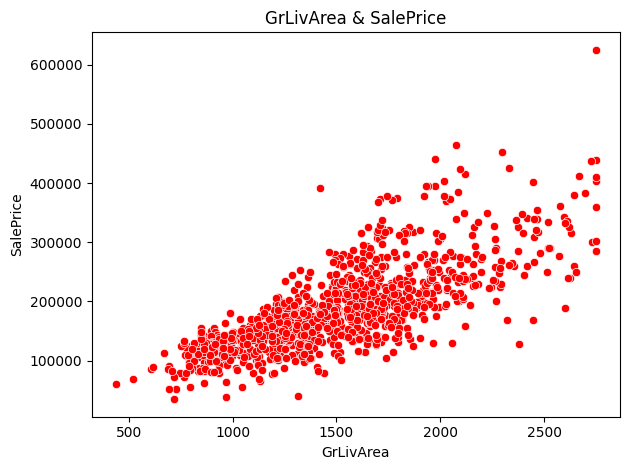

In [ ]:
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],color='red')
plt.title('GrLivArea & SalePrice')
plt.tight_layout()
plt.show()

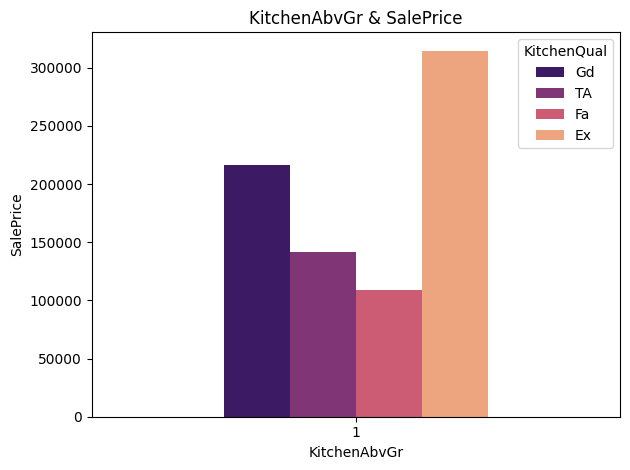

In [ ]:
sns.barplot(x=df['KitchenAbvGr'],y=df['SalePrice'],hue=df['KitchenQual'],palette='magma',width=0.5,errorbar=None)
plt.title("KitchenAbvGr & SalePrice")
plt.legend(title='KitchenQual',loc='upper right',ncol=1)
plt.tight_layout()
plt.show()

Encoding Data

In [ ]:
qual_map = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}

ordinal_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
                'HeatingQC','KitchenQual','FireplaceQu',
                'GarageQual','GarageCond','PoolQC']

for col in ordinal_cols:
    df[col] = df[col].map(qual_map).astype(int)

In [ ]:
nominal_cols = [
    'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
    'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
    'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir',
    'Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence',
    'MiscFeature','SaleType','SaleCondition'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [ ]:
df.drop(columns=['Id'], inplace=True)

Scaling Data

In [ ]:
scaler = StandardScaler()

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Select Feature

In [ ]:
X = X_scaled
y = df['SalePrice']

In [ ]:
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_imputed, y)

lasso_coef = pd.Series(lasso.coef_, index=X_imputed.columns)
top_lasso = lasso_coef[lasso_coef != 0].sort_values(ascending=False).head(15)
print(top_lasso)

2ndFlrSF                 19532.669245
OverallQual              12792.493076
1stFlrSF                 12665.378355
TotalBsmtSF               8788.501573
Neighborhood_NridgHt      7169.319959
BsmtFinSF1                7116.507082
BsmtExposure_Gd           5008.297350
SaleCondition_Partial     4662.956940
GrLivArea                 4270.732543
OverallCond               4070.535185
YearBuilt                 4056.770346
LotArea                   3962.074908
BsmtQual                  3693.174096
Neighborhood_NoRidge      3546.592781
KitchenQual               3494.711319
dtype: float64


In [ ]:
features_lasso = [
    "2ndFlrSF","OverallQual","1stFlrSF","TotalBsmtSF","Neighborhood_NridgHt",
    "BsmtFinSF1","BsmtExposure_Gd","SaleCondition_Partial","GrLivArea",
    "OverallCond","YearBuilt","LotArea","BsmtQual","Neighborhood_NoRidge",
    "KitchenQual"
]


In [ ]:
X = df[features_lasso].copy().fillna(0)
y = df['SalePrice']

Split Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Evaluation

In [ ]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: \nR²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Linear Regression

In [ ]:
lr = LinearRegression()
evaluate_model("Linear Regression", lr, X_train, y_train, X_test, y_test)

Linear Regression: 
R²: 0.9060, MAE: 16066.43, RMSE: 21607.50


Random Forest

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)

Random Forest: 
R²: 0.8935, MAE: 16058.62, RMSE: 23002.54


 Gradient Boosting

In [ ]:
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
evaluate_model("Gradient Boosting", gb, X_train, y_train, X_test, y_test)

Gradient Boosting: 
R²: 0.9093, MAE: 15368.06, RMSE: 21223.59
